# Exploration data


In [9]:
import pandas as pd

# Cargar archivos CSV
test_data = pd.read_csv('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/raw/test.csv')
train_data = pd.read_csv('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/raw/train.csv')

# Explorar estructura
print("Test Data")
print(test_data.shape)  # Dimensiones del DataFrame
print(test_data.columns)  # Nombres de las columnas
print(test_data.head())  # Primeras filas

print("\nTrain Data")
print(train_data.shape)
print(train_data.columns)
print(train_data.head())



Test Data
(29275, 8)
Index(['session_id', 'date', 'timestamp_local', 'user_id', 'country',
       'partnumber', 'device_type', 'pagetype'],
      dtype='object')
   session_id        date          timestamp_local  user_id  country  \
0         746  2024-06-15  2024-06-15 18:36:47.390      NaN       57   
1         746  2024-06-15  2024-06-15 18:37:04.052      NaN       57   
2         746  2024-06-15  2024-06-15 18:37:48.159      NaN       57   
3         746  2024-06-15  2024-06-15 18:38:19.899      NaN       57   
4         746  2024-06-15  2024-06-15 18:38:46.492      NaN       57   

   partnumber  device_type  pagetype  
0        1254            1      24.0  
1       32544            1      24.0  
2       12639            1      24.0  
3       18048            1      24.0  
4       13295            1      24.0  

Train Data
(46551445, 9)
Index(['session_id', 'date', 'timestamp_local', 'add_to_cart', 'user_id',
       'country', 'partnumber', 'device_type', 'pagetype'],
      dtype

In [10]:
import pickle

# Cargar archivo Pickle
with open('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/raw/products.pkl', 'rb') as file:
    products_data = pickle.load(file)

# Explorar estructura
print(type(products_data))  # Tipo de datos
if isinstance(products_data, dict):
    print(len(products_data))  # Número de elementos
    print(list(products_data.keys())[:5])  # Primeras claves
    print(products_data[list(products_data.keys())[0]])  # Ejemplo de datos
elif isinstance(products_data, list):
    print(len(products_data))  # Número de elementos
    print(products_data[:5])  # Primeros elementos
else:
    print(products_data)  # Otra estructura


<class 'pandas.core.frame.DataFrame'>
      discount                                          embedding  partnumber  \
0            0  [-0.13401361, -0.1200429, -0.016117405, -0.167...       32776   
1            0  [-0.0949274, -0.107294075, -0.16559914, -0.174...       41431   
2            0  [-0.12904441, -0.07724628, -0.09799071, -0.164...       39419   
3            1  [-0.12783332, -0.133868, -0.10101265, -0.18888...       36087   
4            1  [-0.14092924, -0.1258284, -0.10809927, -0.1765...       34132   
...        ...                                                ...         ...   
43687        0  [-0.1725829, 0.780391, -0.16265817, -0.1397962...         234   
43688        0  [-0.08114546, 0.7171631, 0.2157723, -0.1599884...         235   
43689        0  [-0.1517721, 1.640085, -0.1506274, -0.06088442...         236   
43690        0  [-0.078192495, 0.012600096, -0.085486665, 0.49...         237   
43691        0  [-0.12523538, 0.058919854, -0.14703132, -0.185...      

---

## User_details

**1. Exploración de los Datos**

In [1]:
import pandas as pd
import json

# Cargar archivo JSON
with open('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/raw/format_user_details.json', 'r') as file:
    user_details = json.load(file)

# Convertir a DataFrame para facilitar el análisis
user_df = pd.json_normalize(user_details)

# Exploración inicial
print(user_df.info())  # Información general del DataFrame
print(user_df.head())  # Muestra las primeras filas
# print(user_df.describe(include='all'))  # Estadísticas generales


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557006 entries, 0 to 557005
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   user_id         557006 non-null  int64 
 1   values.country  557006 non-null  object
 2   values.R        557006 non-null  object
 3   values.F        557006 non-null  object
 4   values.M        557006 non-null  object
dtypes: int64(1), object(4)
memory usage: 21.2+ MB
None
   user_id values.country values.R values.F              values.M
0   430096           [25]     [18]      [6]  [18.197777777777777]
1   134018           [25]     [66]     [32]   [38.86882352941177]
2    53750           [25]      [2]     [64]   [38.54178082191778]
3   180665           [25]     [22]     [22]  [43.407916666666665]
4   134209           [25]      [7]      [2]               [43.46]


**2. Validaciones Básicas**

In [2]:
# Verificar valores nulos
print(user_df.isnull().sum())

# Verificar duplicados
print(user_df.duplicated(subset=['user_id']).sum())


user_id           0
values.country    0
values.R          0
values.F          0
values.M          0
dtype: int64
0


**3. Limpieza y Transformación**

In [3]:
# Convertir listas a valores individuales
user_df['country'] = user_df['values.country'].apply(lambda x: x[0] if isinstance(x, list) else x)
user_df['R'] = user_df['values.R'].apply(lambda x: x[0] if isinstance(x, list) else x)
user_df['F'] = user_df['values.F'].apply(lambda x: x[0] if isinstance(x, list) else x)
user_df['M'] = user_df['values.M'].apply(lambda x: x[0] if isinstance(x, list) else x)

# Eliminar columnas originales
user_df = user_df.drop(columns=['values.country', 'values.R', 'values.F', 'values.M'])

# Verificar el resultado
print(user_df.info())
print(user_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557006 entries, 0 to 557005
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  557006 non-null  int64  
 1   country  557006 non-null  int64  
 2   R        557006 non-null  int64  
 3   F        557006 non-null  int64  
 4   M        557006 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 21.2 MB
None
   user_id  country   R   F          M
0   430096       25  18   6  18.197778
1   134018       25  66  32  38.868824
2    53750       25   2  64  38.541781
3   180665       25  22  22  43.407917
4   134209       25   7   2  43.460000


Normalización de las métricas R, F, M

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
user_df[['R', 'F', 'M']] = scaler.fit_transform(user_df[['R', 'F', 'M']])

print(user_df.head())


   user_id  country         R         F         M
0   430096       25  0.016438  0.000558  0.000001
1   134018       25  0.060274  0.002976  0.000003
2    53750       25  0.001826  0.005951  0.000003
3   180665       25  0.020091  0.002046  0.000003
4   134209       25  0.006393  0.000186  0.000003


Exploración Estadística:

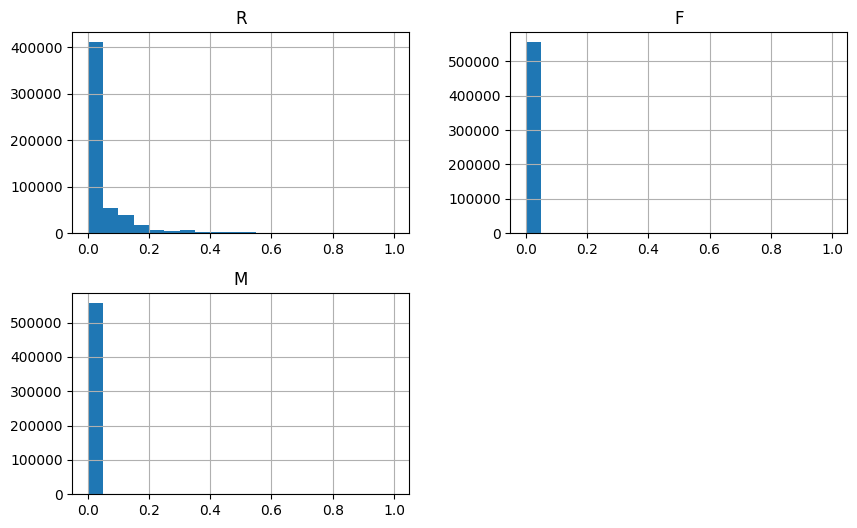

In [5]:
import matplotlib.pyplot as plt

user_df[['R', 'F', 'M']].hist(bins=20, figsize=(10, 6))
plt.show()


Unicidad de user_id: Asegurémonos de que no haya duplicados.

In [6]:
assert user_df['user_id'].is_unique, "Los IDs de usuario no son únicos"


Revisión de Valores Fuera de Rango: 

In [10]:
assert user_df[['R', 'F', 'M']].min().min() >= 0, "Existen valores negativos"
assert user_df[['R', 'F', 'M']].max().max() <= 1, "Existen valores mayores a 1"


Chequeo General:

In [8]:
print(user_df.describe())
print(user_df.head())


             user_id        country              R              F  \
count  557006.000000  557006.000000  557006.000000  557006.000000   
mean   278503.500000      25.129246       0.057873       0.003435   
std    160793.926358       2.781777       0.117508       0.005338   
min         1.000000       1.000000       0.000000       0.000000   
25%    139252.250000      25.000000       0.004566       0.000744   
50%    278503.500000      25.000000       0.016438       0.002046   
75%    417754.750000      25.000000       0.052968       0.004370   
max    557006.000000      93.000000       1.000000       1.000000   

                   M  
count  557006.000000  
mean        0.000026  
std         0.002493  
min         0.000000  
25%         0.000002  
50%         0.000003  
75%         0.000003  
max         1.000000  
   user_id  country         R         F         M
0   430096       25  0.016438  0.000558  0.000001
1   134018       25  0.060274  0.002976  0.000003
2    53750       25  

Optimización de Tipos de Datos

In [11]:
# Revisión de tipos actuales
print("Tipos actuales:")
print(user_df.dtypes)
print("\nMemoria actual: {:.2f} MB".format(user_df.memory_usage(deep=True).sum() / (1024 * 1024)))

# Optimización de tipos
user_df['user_id'] = user_df['user_id'].astype('int32')
user_df['country'] = user_df['country'].astype('int32')
user_df['R'] = user_df['R'].astype('float32')
user_df['F'] = user_df['F'].astype('float32')
user_df['M'] = user_df['M'].astype('float32')

# Revisión de tipos optimizados
print("\nTipos optimizados:")
print(user_df.dtypes)
print("\nMemoria optimizada: {:.2f} MB".format(user_df.memory_usage(deep=True).sum() / (1024 * 1024)))


Tipos actuales:
user_id      int64
country      int64
R          float64
F          float64
M          float64
dtype: object

Memoria actual: 21.25 MB

Tipos optimizados:
user_id      int32
country      int32
R          float32
F          float32
M          float32
dtype: object

Memoria optimizada: 10.62 MB


4. Guardado del dataset Optimizado

In [12]:
user_df.to_csv('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/new_processed/user_data.csv', index=False)
